# Evolutionary algorithms in optimisation

In [1]:
# Load libraries required

import numpy as np
import random 

In [2]:
"""Calculate distance between two genomes

    Args:
      word1: master genome
      word2: mutated genome

    Returns:
      A number that calculates distance between two genome, minimum 0, maximum 21

"""

# for each letter in the first word, 
# if the letter is not the same as that letter in the second word, 
# then increase the distance by 1

def distWord(word1, word2):
    distance = 0
    for i in range(0, len(word1)):
        if word1[i] != word2[i]:
            distance += 1
    return distance



In [3]:
"""
Setting the master sequence
"""

master = "GATACCAATTACCAGATACCA"

In [4]:
"""Populate starting sequence 
   Formed by random sequences of length in the letters A, C, G, T
    
   Const:
      N: Constant number 10
   
   Args:
      L: Constant number 21
      letters: List of letters A, C, G, T

    Returns:
      A string of 21 random sequences consisted of letters A, C, G, T

"""

# Initialise the first genome

letters  = ['A', 'C', 'T', 'G']
pops = []

N = 10
L = 21

# Generates L length string of chars in Letters

def createRandomGenome(L,letters):
    genome = ''
    for i in range(L):
        genome=genome + random.choice(letters)
    return genome


In [5]:
"""Generate and display starting sequence of 21 random sequence 10 times
    
    Args:
      seq: Number of genomes of 21 random sequence

    Returns:
      A list of 10 genomes
"""

print("Creating starting sequence:")


# Make N genomes, number of letters in common with master genome
for i in range(N):
    g = []
    g = createRandomGenome(L,letters)
    pop = [g, len(master)-distWord(master,g)]
    pops.append(pop)

pops

Creating starting sequence:


[['GCGGCGCAGAAAGTAGACCGT', 5],
 ['ACAAATTTGTAGCCGATGTGA', 8],
 ['GTGTACTAGCATACAGATTGG', 4],
 ['CGAGGCTTCCAATTCCATGGC', 2],
 ['CCCGTCGAACAGGGCGAGCCC', 5],
 ['CAATCTCTCGGTGTACGGCGG', 3],
 ['CGGCCACTAAAGAAGGTGCAG', 6],
 ['CTGACCAGGCCTAGCAATGCG', 6],
 ['AATAATCATTTGCTCAGCATT', 8],
 ['AGAATTTTCATATACGGTCCG', 4]]

In [6]:
"""Select the genome with the smallest distance to the master genome

    Args:
      pops: List of genomes

    Returns:
      A single smallest genome and its distance from the master genome

"""

# reutrn the most similar genome to master, similar characters
def selectMostSimilar(pops):
    selection_list = sorted(pops, key=lambda x: x[1],reverse=True)
    best = selection_list[0]
    return best 

In [7]:
"""Call selectMostSimilar function, assign the output to an object called parent and display
"""

parent = selectMostSimilar(pops)
parent

['ACAAATTTGTAGCCGATGTGA', 8]

In [8]:
"""Produce offspring and mutate with mutate rate as per offspring probability
    
   Args:
      parent: the best genome defined by the smallest distance to the master genome

    Returns:
      A list of 10 offsprings

"""

p = 10

# Run 10 times, go through parent genome, change 1 in 10 characters, and add that to a list
# Return the list

def createOffspring(parent):
    
    offspring = [] # list of offspring to be mutated
    # mutate_list = [] # placeholder for mutated offspring
    
    for i in range(N):
        offspring_genome = '' 
    
        for char in str(parent[0]): 
            if random.randint(1,100) <= p : # probability
                offspring_genome = offspring_genome + random.choice(letters) 
            else:  
                offspring_genome = offspring_genome + char 

        offspring.append(offspring_genome, )
      
    return offspring

In [9]:
"""Call createOffspring function, assign the output to an object called offspring and display
"""
offspring = createOffspring(parent)
offspring 

['ACAAATTTGTAGCCGATGTGA',
 'ACTAATTTGTAGCCGATGTGA',
 'ACATATTTGTAGCCGATGTGA',
 'ATAAATTTGTAGCCGATGTGA',
 'CCAAATTTGTAGCCGATGTGA',
 'TCTAACTTGGAGCCGATGTGA',
 'ACAAATTTGTAGCCGATGTGA',
 'ACAAATTTGTAGCCGATATGA',
 'ACAAAGTTTTAGGCGATGTCA',
 'ACAAATTTGAAGCCGATGTGA']

In [10]:
"""Create children from offspring, 
    Find the most similar genome from a list of 10 offspring genomes
    
    Args:
          parent: the best genome which is the output of selectMostSimilar function

        Returns:
          A single child with most similar genome to the master 

"""

def getBestChild(parent):
    mutated_list = []
    # create children from offspring
    children = createOffspring(parent)
    # mutate children
    for c in children:
        mutated = [c, len(master)-distWord(master,c)]
        mutated_list.append(mutated)
    
    best = selectMostSimilar(mutated_list)
    return best


In [11]:
"""Call getBestChild function, assign the output to an object called best and display
"""

best = getBestChild(parent)
best

['ACTATTTTGTAACCGATGTGA', 9]

In [12]:
"""Display parent to inspect
"""
parent

['ACAAATTTGTAGCCGATGTGA', 8]

In [13]:
"""Create a new generation of offspring, 
   If any offspring has a smaller distance to the master sequence 
   Select the genome with the smallest distance
   Use that genome to create a new generation of offspring, 
   Otherwise use the previous one again
 
    Args:
          parent: the best genome

        Returns:
          A single child with most similar genome to the master 

"""

# take parent, generate offspring from parent, 
# choose best offspring, and choose between best offspring and parent for next generation
def runGeneration(parent):
    best_child = getBestChild(parent)
    
    if best_child[1] > parent[1]:
        fittest = best_child
    else:
        fittest = parent
    
    return fittest
    

In [14]:
"""Repeat the process for a number of g generations, till the master sequence has been achieved through evolution
   Display the process in each g generation
"""


fittest = parent

progress_g = []
progress_f = []

g = 0
while fittest[1] !=21:
    new_fittest = runGeneration(fittest)
    fittest = new_fittest
    g +=1
    progress_g.append(g)
    progress_f.append(fittest[1])
    # print(fittest)
    print("Fittest: ", fittest, "Generation: ", g)

print("Master sequence has been achieved")
print("Probability ", p, "in 100")
print("Number of offspring ", N)
print("Number of generations ", g)

    

Fittest:  ['ACAAACTTCTAGCCGATGCGA', 10] Generation:  1
Fittest:  ['ACAAACTTCTAGCCGATGCCA', 11] Generation:  2
Fittest:  ['ACAAACATCTAGCCGATGCCA', 12] Generation:  3
Fittest:  ['ACAAACATCTAGCCGATACCA', 13] Generation:  4
Fittest:  ['ACAAACATTTAGCCGATACCA', 14] Generation:  5
Fittest:  ['ACAAACATTTAGCCGATACCA', 14] Generation:  6
Fittest:  ['ACAAACATTTAGCCGATACCA', 14] Generation:  7
Fittest:  ['ACAAACATTTAGCCGATACCA', 14] Generation:  8
Fittest:  ['ACAAACAATTAGCCGATACCA', 15] Generation:  9
Fittest:  ['ACAAACAATTAGCCGATACCA', 15] Generation:  10
Fittest:  ['ACAAACAATTAGCCGATACCA', 15] Generation:  11
Fittest:  ['ACAAACAATTAGCCGATACCA', 15] Generation:  12
Fittest:  ['ACAAACAATTAGCCGATACCA', 15] Generation:  13
Fittest:  ['ACAAACAATTAGCAGATACCA', 16] Generation:  14
Fittest:  ['ACAAACAATTAGCAGATACCA', 16] Generation:  15
Fittest:  ['ACAAACAATTAGCAGATACCA', 16] Generation:  16
Fittest:  ['ACAAACAATTAGCAGATACCA', 16] Generation:  17
Fittest:  ['ACAAACAATTAGCAGATACCA', 16] Generation:  18
F

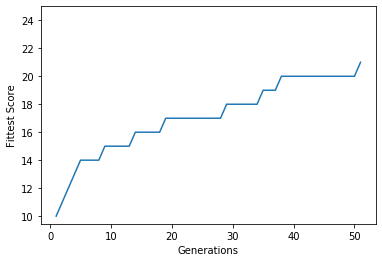

In [16]:
# Plot progress
import matplotlib.pyplot as plt

x = np.array(progress_g)
y = np.array(progress_f)

plt.plot(x, y)
plt.xlabel('Generations')
plt.ylim(top=25)
plt.ylabel('Fittest Score')
plt.show()